[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/AI342-F1/Lab-Tutoral/blob/main/AI342Lab1.ipynb)

# Lab 1: Introduction to Digital Images and Image Processing with Python
**Course:** AI342 Image Processing  
**University:** Taibah University  
**College:** Computer Science and Engineering  
**Department:** AI & DS
---
### Learning Objectives:
* Represent a digital image as a numerical array.
* Understand pixels, spatial resolution, and grey level intensity.
* Load, display, and inspect images in Python.
* Apply simple low-level image processing operations.
* Relate practical operations to the image processing pipeline introduced in Chapter 1

## 1. Environment Setup

In [1]:
# write your code here

import numpy as np
import matplotlib.pyplot as plt
import cv2

## 2. What is a digital image in practice?
In the lecture, a digital image is defined as a two dimensional function $f(x,y)$ where the value at each coordinate represents intensity. In practice, this function is stored as a matrix of numbers.

##**Exercise 2.1: Create a synthetic image**


In [18]:
# Task: Create an 8x8 black image (matrix of zeros)
# Hint: Use np.zeros((rows, cols))
row = 8
col = 8
black_image = np.zeros((row, col))

# print the image 
print(black_image)

# --- Discussion Questions ---
# 1. What is the spatial resolution of this image?
# b = M * N * k
# where k is the number of bits each pixel has
# b = 8 * 8 * 2
# 2. What does each value represent?
# the spatial coordinates are the rows and columns that make up the image
# each value within each coordinate will store bits -> indicating the result of the function 
# AKA the intensity of grey scale of the amplitude/pixel

[[0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]]


##**Exercise 2.2: Visualise the image**

<function matplotlib.pyplot.show(close=None, block=None)>

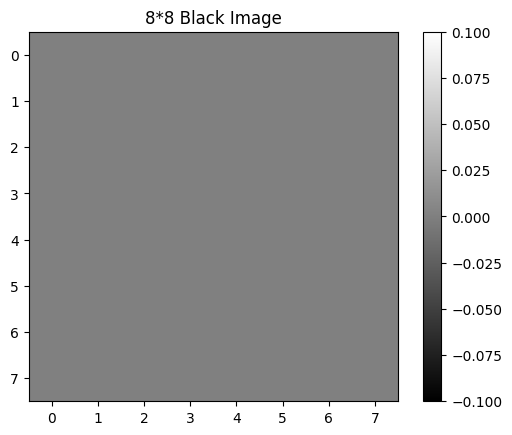

In [ ]:
# write your code here

plt.imshow(black_image, cmap='grey')
plt.title('8*8 Black Image')
plt.colorbar()
plt.show

[[0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0]]


<function matplotlib.pyplot.show(close=None, block=None)>

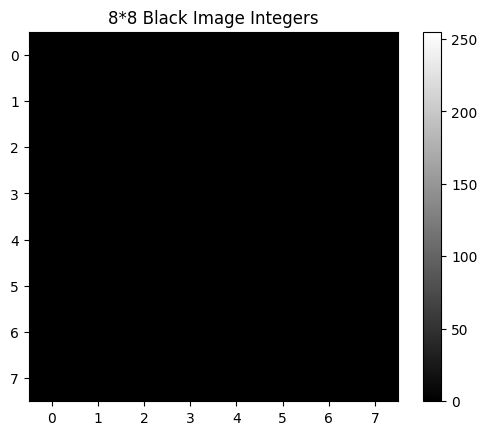

In [6]:
# why the image is not totally black that is clearly grey!

# turn the values into integers
black_image_int = np.zeros((row, col), dtype=int)

# display the matrix
print(black_image_int)

# display it using plt
plt.imshow(black_image_int, cmap='grey', vmin=0, vmax=255) # this is the fix it is not about the integers
plt.title('8*8 Black Image Integers')
plt.colorbar()
plt.show

## 3. Pixels and intensity values
Pixels are the smallest units of a digital image and hold quantised intensity values, as discussed in the slides on pixels and digitisation
## **Exercise 3.1: Modify individual pixels**


In [ ]:
# write your code here

# Task: Change some pixels to 255 (White) and re-visualize
# image[row, col] = 255
# WRITE YOUR CODE HERE:
black_image[4,4] = 128 #hehe i like this
black_image[[2],[7]] = 255
print(black_image)
plt.imshow(black_image, cmap='grey')
plt.show()

#Questions
#1.	Which pixel is brighter and why?
#2.	How does quantisation affect visual appearance?

## 4. Grey scale images
The course focuses primarily on grey scale images with one sample per pixel.
## **Exercise 4.1: Generate a gradient image**


[[  0.   1.   2. ... 253. 254. 255.]
 [  0.   1.   2. ... 253. 254. 255.]
 [  0.   1.   2. ... 253. 254. 255.]
 ...
 [  0.   1.   2. ... 253. 254. 255.]
 [  0.   1.   2. ... 253. 254. 255.]
 [  0.   1.   2. ... 253. 254. 255.]]


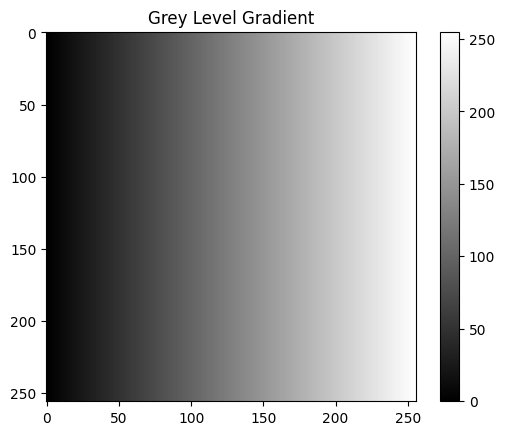

[[  0.   1.   2. ... 253. 254. 255.]
 [  0.   1.   2. ... 253. 254. 255.]
 [  0.   1.   2. ... 253. 254. 255.]
 ...
 [  0.   1.   2. ... 253. 254. 255.]
 [  0.   1.   2. ... 253. 254. 255.]
 [  0.   1.   2. ... 253. 254. 255.]]


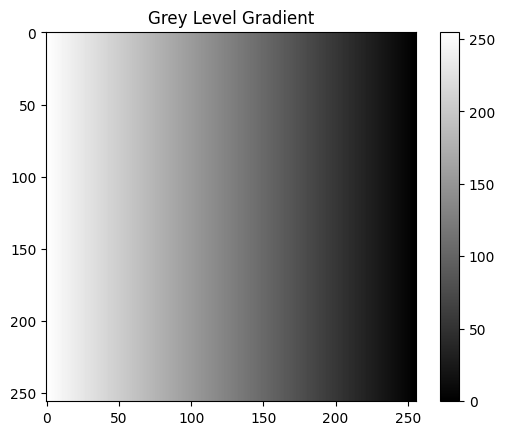

In [ ]:
# write your code here

gradient = np.tile(np.linspace(0, 255, 256), (256, 1))

print(gradient)

# 256 value stored in a linear array
# keep stacking 256 row on top of each other just like that 
# and only one time at columns

plt.imshow(gradient, cmap='grey', vmin=0, vmax=255)
plt.title('Grey Level Gradient')
plt.colorbar()
plt.show()

# you can flip it like so
gradient_flipped = np.tile(np.linspace(255, 0, 256), (256, 1))

print(gradient)

plt.imshow(gradient_flipped, cmap='grey', vmin=0, vmax=255)
plt.title('Grey Level Gradient')
plt.colorbar()
plt.show()

#Questions
#1.	How many grey levels are visible?
#2.	What data type is used to store the pixel values? uint8 -> unsigned integer bit


## 5. Image acquisition and representation
Image acquisition converts a physical scene into a digital image. In Python, loading an image is equivalent to acquiring an already digitised scene.
## **Exercise 5.1: Load and inspect an image**

(266, 474, 3)
uint8
[[[ 39 121 237]
  [ 39 121 237]
  [ 39 121 237]
  ...
  [113 120 229]
  [115 123 230]
  [116 124 231]]

 [[ 39 121 237]
  [ 39 121 237]
  [ 39 121 237]
  ...
  [112 119 228]
  [113 121 227]
  [113 121 227]]

 [[ 39 121 237]
  [ 39 121 237]
  [ 39 121 237]
  ...
  [111 118 227]
  [109 117 224]
  [109 117 224]]

 ...

 [[ 20  27  56]
  [  7  14  43]
  [  9  16  46]
  ...
  [ 23  14  31]
  [ 23  14  31]
  [ 21  12  28]]

 [[ 41  47  77]
  [  5  11  41]
  [  9  16  46]
  ...
  [ 23  14  31]
  [ 25  15  32]
  [ 66  57  74]]

 [[ 53  59  89]
  [  5  11  41]
  [ 11  17  47]
  ...
  [ 23  14  31]
  [ 26  16  33]
  [ 66  57  74]]]


<function matplotlib.pyplot.show(close=None, block=None)>

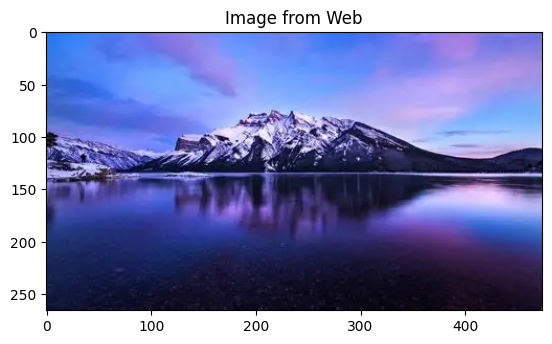

In [37]:
# write your code here

path = './OIP.webp'

from matplotlib.image import imread

webimage = imread(path)

print(webimage.shape)
print(webimage.dtype)
print(webimage)

# display
plt.imshow(webimage)
plt.title('Image from Web')
plt.show

(266, 474)
float64


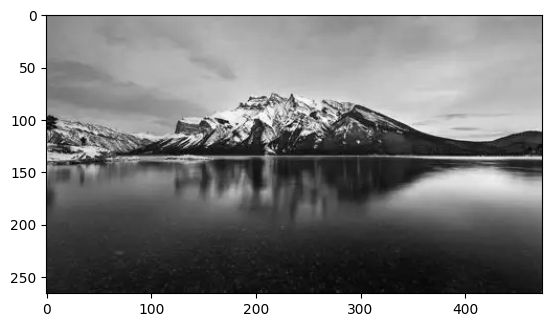

In [39]:
# Task 
# Convert the image to grey scale by averaging the colour channels. 
# webimage is just an array/matrix
webimage_grey = webimage

# i take the avg of the RGB of each channel value in the pixel itself 
webimage_grey = webimage_grey.mean(axis=2) # prev. i used 1 and it appeard slim?
# so the image is 3d it has height axis 0, width axis 1, and pixel(intensity level) 2
# that is why the axis=2 !!

print(webimage_grey.shape)
print(webimage_grey.dtype)

plt.imshow(webimage_grey, cmap='grey')
plt.show()

## 6. Low level image processing: image in, image out
Low level processing improves visual quality without extracting semantic meaning, as described in the lecture pipeline
## **Exercise 6.1: Image enhancement by contrast stretching**

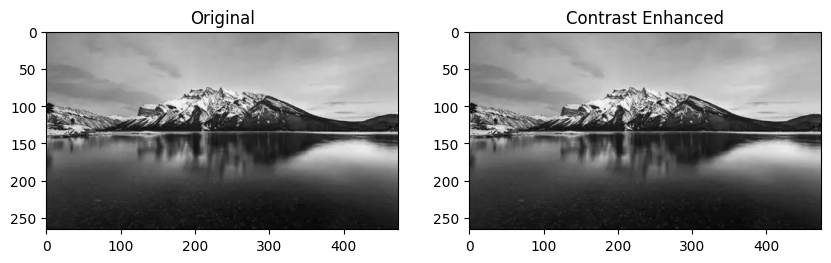

0.0 253.0
0.0 253.0


In [41]:
# write your code here

# in contrast, you define the min intensity value and the ,ax intensity value
# and try to stretch them

min_Val = webimage_grey.min()
max_val = webimage_grey.max()

enhanced = (webimage_grey - min_Val) / (max_val - min_Val) * 255


plt.figure(figsize=(10,4)) 
plt.subplot(1,2,1) 
plt.imshow(webimage_grey, cmap='gray') 
plt.title("Original") 
 
plt.subplot(1,2,2) 
plt.imshow(enhanced, cmap='gray') 
 
plt.title("Contrast Enhanced") 
plt.show()


print(min_Val, max_val)
print(webimage_grey.min(), webimage_grey.max())

#Questions
#1.	Which image has better visibility of details?
#2.	Is this enhancement subjective or objective?


## 7. Noise and image restoration
Noise removal is a core example of low level processing.

## **Exercise 7.1: Add artificial noise**

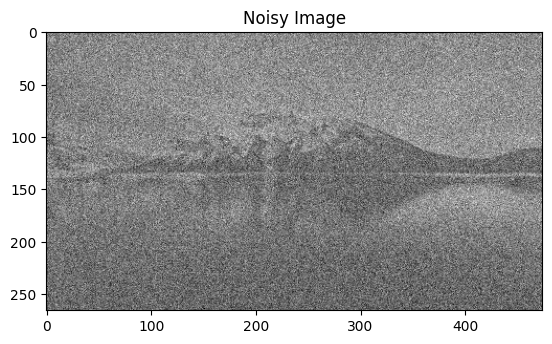

In [45]:
# write your code here

noise = np.random.normal(0, 100, webimage_grey.shape) # this is the normal distribution functions with mean of 0 and std of 20
noisy = webimage_grey + noise # new array with noise

plt.imshow(noisy, cmap='gray') 
plt.title("Noisy Image") 
plt.show() 

## **Exercise 7.2: Simple smoothing filter**

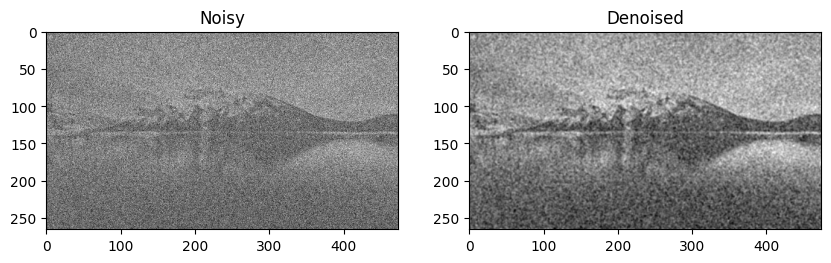

In [ ]:
def mean_filter(img, k=3): # try k=5, k=9
    pad = k // 2
    padded = np.pad(img, pad, mode='edge')
    output = np.zeros_like(img)

    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            output[i, j] = padded[i:i+k, j:j+k].mean()
    return output

# complete the code here

# use the function

# how about running it two times?
for i in range(10): 
    denoised = mean_filter(noisy)

plt.figure(figsize=(10,4)) 
plt.subplot(1,2,1) 
plt.imshow(noisy, cmap='gray') 
plt.title("Noisy") 
 
plt.subplot(1,2,2) 
plt.imshow(denoised, cmap='gray') 
plt.title("Denoised") 
plt.show() 

## 8. From image processing to image analysis
The lecture distinguishes between low, mid, and high level processing.
## **Exercise 8.1: Simple threshold segmentation**

In [ ]:
## write your code here


# Discussion:
# 1. Is this segmentation reliable?
# 2. What information is lost when converting to binary?

# **9. Mini project: connecting theory to practice**

**Task**

Using only NumPy and Matplotlib:

1.	Create a synthetic image containing at least two objects

2.	Add noise to the image

3.	Apply enhancement and denoising

4.	Segment the objects using a threshold

**Deliverables**

•	Code

•	Output images

•	Short explanation mapping each step to the image processing stages shown in the Chapter 1 pipeline diagram


***Note: Organize your project into logical steps using separate cells, include a Text Cell before each stage to explain your approach, and ensure all results are clearly visualized using titles and subplots***